In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from common_plotting import read_data, plot, years, months, yearsFmt


In [28]:
pt100_data = pd.read_csv('k2000-4w-res-log.csv', parse_dates=['datetime']).set_index('datetime')

In [5]:
# From https://us.flukecal.com/pt100-calculator for PT-385
R0 = 100
A = 3.9083e-3
B = -5.775e-7
PT385_eq = lambda t, Rt: R0 * (1 + A*t + B*(t**2)) - Rt
fsolve(PT385_eq, 30, args=(109.80,))[0]

25.168440911997727

<AxesSubplot:xlabel='datetime'>

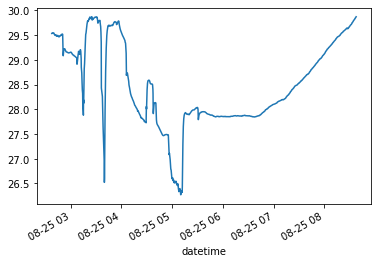

In [30]:
pt100_data['pt100_temperature'] = pt100_data['k2000_ohm'].apply(lambda resistance: fsolve(PT385_eq, 25, args=(resistance,))[0])
pt100_data['pt100_temperature'].last('6h').plot()

In [21]:
pt100_data['pt100_temperature'].last('6h')

datetime
2022-08-22 12:30:06.334436    31.256033
2022-08-22 12:30:16.374249    31.252520
2022-08-22 12:30:40.191275    31.252027
2022-08-22 12:30:50.228249    31.251340
2022-08-22 12:31:00.267699    31.250961
                                ...    
2022-08-22 18:29:21.686387    30.830893
2022-08-22 18:29:31.723364    30.829424
2022-08-22 18:29:41.758354    30.827500
2022-08-22 18:29:51.795405    30.825610
2022-08-22 18:30:01.832897    30.825230
Name: pt100_temperature, Length: 1885, dtype: float64

In [2]:
pt100_comparison_data = pd.read_csv('k2000-x2-4w-res-log.csv', parse_dates=['datetime']).set_index('datetime')

<AxesSubplot:xlabel='datetime'>

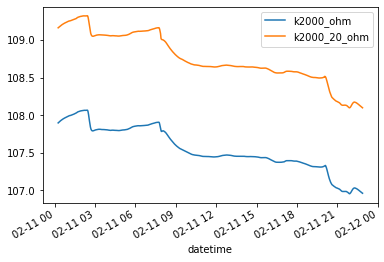

In [4]:
pt100_comparison_data[['k2000_ohm','k2000_20_ohm']].plot()